In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [6]:
import os
dirpath = '../mimic3models/decompensation/keras_logs'
histpaths = [x for x in os.listdir(dirpath) if 'dsup' in x]
namestart = len('k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_')
names = [histpath[namestart-4:-5] for histpath in histpaths]
histpaths = [os.path.join(dirpath,histpath) for histpath in histpaths]

In [7]:
histpaths+names

['../mimic3models/decompensation/keras_logs/k_lstm.n128.dep1.dsup.bs8.ts1.0DEC_doc2vec_weighted_.csv',
 '../mimic3models/decompensation/keras_logs/k_lstm.n128.dep1.dsup.bs8.ts1.0DEC_doc2vec_structured_weighted_condensed_.csv',
 '../mimic3models/decompensation/keras_logs/k_lstm.n128.dep1.dsup.bs8.ts1.0DEC_cuis_weighted_.csv',
 '../mimic3models/decompensation/keras_logs/k_lstm.n128.dep1.dsup.bs8.ts1.0DEC_doc2vec_structured_weighted_.csv',
 '../mimic3models/decompensation/keras_logs/k_lstm.n128.dep1.dsup.bs8.ts1.0DEC_structured_weighted_condensed_.csv',
 '../mimic3models/decompensation/keras_logs/k_lstm.n128.dep1.dsup.bs8.ts1.0DEC_words_weighted_.csv',
 '../mimic3models/decompensation/keras_logs/k_lstm.n128.dep1.dsup.bs8.ts1.0DEC_structured_weighted_.csv',
 'DEC_doc2vec_weighted',
 'DEC_doc2vec_structured_weighted_condensed',
 'DEC_cuis_weighted',
 'DEC_doc2vec_structured_weighted',
 'DEC_structured_weighted_condensed',
 'DEC_words_weighted',
 'DEC_structured_weighted']

In [8]:
def get_csv_hist(path):
    df = pd.read_csv(path, sep=';')
    return df.to_dict(orient='list')

In [9]:
# histpaths = ['cuis_ihm_history.pk','words_ihm_history.pk', 'ihm_d2v_history.pk']
# names = ['Bag of CUIs IHM', 'Bag of Words IHM', 'doc2vec IHM']
# histpaths = ['ihm_d2v_unweighted_history.pk', 'cuis_ihm_weighted_history.pk', 'words_IHM_history.pk','cuis_ihm_weighted_gradclip1.0_history.pk', 'words_IHM_weighted_l10.5_history.pk']
# names = ['doc2vec IHM', 'CUIs IHM', 'Words IHM', 'Cuis Gradclip', 'words l1=0.5']
histories = [] 
for i,path in enumerate(histpaths):
    try:
        if 'pk' in path:
            with open(path, 'rb') as pkfile:
                hst = pickle.load(pkfile)
                hst['name'] = names[i]
                histories.append(hst)
        if 'csv' in path:
            hst = get_csv_hist(path)
            hst['name'] = names[i]
            histories.append(hst)
    except:
        pass

In [10]:
# from matplotlib import gridspec

# fig2 = plt.figure(constrained_layout=True)
# spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[1, 0])
# f2_ax4 = fig2.add_subplot(spec2[1, 1])

In [11]:
import seaborn as sns
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']
def plot_multiple(metrics, histories):
    pal = sns.color_palette("colorblind", len(histories))

    for i,history in enumerate(histories):
        epochs = history['epoch']
        for j,metric in enumerate(metrics):
            values = history[metric]
            val_values = history[metric]
#             plt.plot(epochs, values, 'bo', label=history['name']+' Training '+metric, color = pal[i])
            plt.plot(epochs, val_values, 'b', label=history['name']+' '+metric, color = pal[i], linestyle = linestyles[j])



    plt.title('DEC '+', '.join(metrics))
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#     plt.savefig('DEC'+metrics[0]+'.pdf',bbox_inches='tight')
    plt.show()



In [12]:
histories[0].keys()

dict_keys(['epoch', 'loss', 'train_acc', 'train_auprc', 'train_auroc', 'train_mcc', 'train_minpse', 'train_prec0', 'train_prec1', 'train_rec0', 'train_rec1', 'val_acc', 'val_auprc', 'val_auroc', 'val_loss', 'val_mcc', 'val_minpse', 'val_prec0', 'val_prec1', 'val_rec0', 'val_rec1', 'name'])

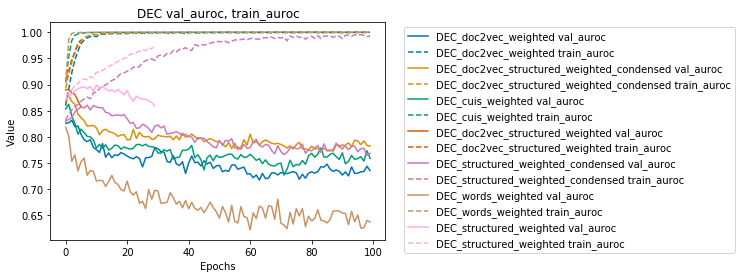

In [13]:
plot_multiple(['val_auroc', 'train_auroc'],histories)

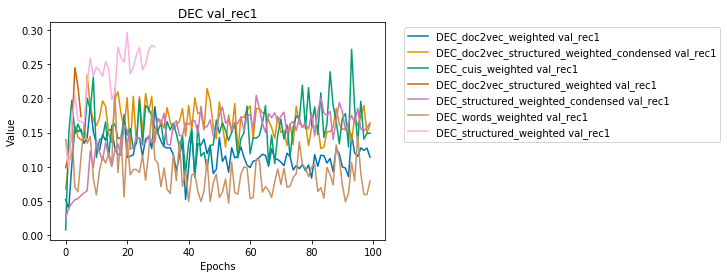

In [14]:

plot_multiple(['val_rec1'],histories)



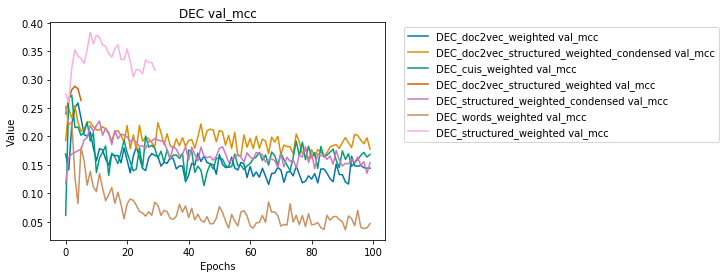

In [15]:
plot_multiple(['val_mcc'],histories)

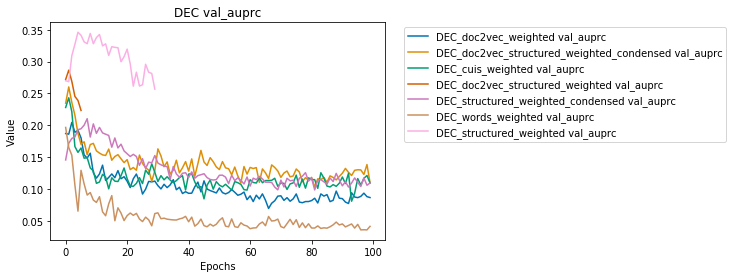

In [16]:
plot_multiple(['val_auprc'],histories)

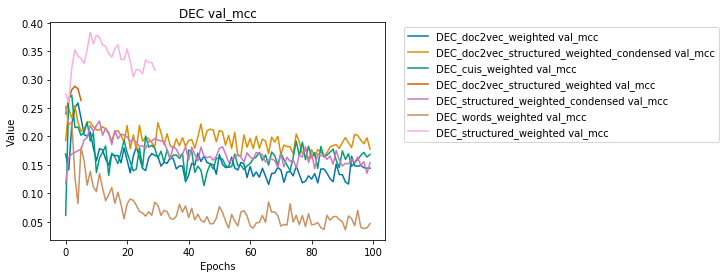

In [17]:
plot_multiple(['val_mcc'],histories)

In [ ]:
import pickle
path = 'IHM_d2v_weighted_bestmcc.csv'
with open (path, 'rb') as pkfile:
    results = pickle.load(pkfile)

In [1]:
import pandas as pd
import metrics
def getcsvmetrics(paths, names):
    other_metrics = []
    for i,path in enumerate(paths):
        df = pd.read_csv('tests/'+path)
        predictions = df['prediction'].tolist()
        y_true = df['y_true'].tolist()
        metrics_dict =  metrics.print_metrics_binary(y_true, predictions, verbose=0)
        metric_values = [item for i,item in enumerate(metrics_dict.values()) ]
        other_metrics.append(metric_values)
    metric_names = [item for i,item in enumerate(metrics_dict.keys()) ]
    chart = pd.DataFrame(other_metrics, index=names, columns =metric_names )
    chart.to_csv('Charts/IHM_metrics_chart.csv')
    return chart


In [2]:
paths = ['IHM_d2v_weighted_bestmcc.csv','test_cuis_ihm_weighted_best_val_mcc.ckpt_.csv','IHM_WEIGHTEDCONDENSED_BESTMCC.csv', 'IHM_BSLN.csv','test_words_IHM_unweighted_best_val_mcc.ckpt_.csv','IHM_COMBINED_WEIGHTED_BESTMCC.csv']#['PHE_COMBINED_ALL_TIMESTEPS_BESTMCC.csv','PHE_COMBINED_CONDENSED_BESTMCC.csv','PHE_STRUCTURED_CONDENSED_BESTMCC.csv','PHE_D2V_WEIGHTED_BESTMCC.csv','PHE_BSLN.csv', 'words_phe.csv', 'cuis_phe.csv']
names = ['d2v','cuis','Combination_Condensed', 'baseline','words', 'combined']#['ALL_COMBINED', 'COMBINED_CONDENSED', 'STRUCT_CONDENSED','D2V','BASELINE','WORDS','CUIS']
getcsvmetrics(paths, names)

,acc,prec0,prec1,rec0,rec1,auroc,auprc,minpse,mcc
d2v,0.884429,0.884391,1.000000,1.000000,0.002793,0.779848,0.293539,0.323308,0.049703
cuis,0.883781,0.905331,0.496933,0.969974,0.226257,0.691199,0.339696,0.335196,0.253546
Combination_Condensed,0.887342,0.891040,0.619048,0.994141,0.072626,0.828351,0.398423,0.444134,0.184546
baseline,0.896477,0.920186,0.585153,0.966806,0.358289,0.853569,0.490054,0.500000,0.405319
words,0.846229,0.905464,0.309446,0.922373,0.265363,0.642612,0.260992,0.296089,0.158896
combined,0.889642,0.895466,0.617647,0.990941,0.112299,0.846089,0.437799,0.454545,0.230161
